[Bag of Words Meets Bags of Popcorn](https://www.kaggle.com/c/word2vec-nlp-tutorial/data)
======

## Data Set

The labeled data set consists of 50,000 IMDB movie reviews, specially selected for sentiment analysis. The sentiment of reviews is binary, meaning the IMDB rating < 5 results in a sentiment score of 0, and rating >=7 have a sentiment score of 1. No individual movie has more than 30 reviews. The 25,000 review labeled training set does not include any of the same movies as the 25,000 review test set. In addition, there are another 50,000 IMDB reviews provided without any rating labels.

## File descriptions

labeledTrainData - The labeled training set. The file is tab-delimited and has a header row followed by 25,000 rows containing an id, sentiment, and text for each review.
## Data fields

* id - Unique ID of each review
* sentiment - Sentiment of the review; 1 for positive reviews and 0 for negative reviews
* review - Text of the review

## Objective
Objective of this dataset is base on **review** we predict **sentiment** (positive or negative) so X is **review** column and y is **sentiment** column

## 1. Load Dataset
we only forcus on "labeledTrainData.csv" file

Let's first of all have a look at the data.

[Click here to download dataset](https://s3-ap-southeast-1.amazonaws.com/ml101-khanhnguyen/week3/assignment/labeledTrainData.tsv)

In [100]:
# Import pandas, numpy
import pandas as pd
import numpy as np
import requests

open('labeledTrainData.tsv', 'wb').write(requests.get("https://github.com/toannv97/DefC/raw/master/Week%206/labeledTrainData.tsv", allow_redirects=True).content)


33556378

In [0]:
# Read dataset with extra params sep='\t', encoding="latin-1"
 IMDB = pd.read_csv("/content/labeledTrainData.tsv",sep='\t', encoding="latin-1")

## 2. Preprocessing

In [7]:
# stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
# Removing special characters and "trash"
import re

def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = (re.sub('(?::|;|=)(?:-)?(?:\)|\(|D|P)', ' ', text) + ' ' + ' '.join(emoticons).replace('-', '')).lower()
    text = re.sub('[\W]+', ' ', text)
    return text
print(preprocessor("<asd>:D :-D aaa---++++DDD<bbb>"))

 aaa ddd d d


In [46]:
# tokenizer and stemming
# tokenizer: to break down our twits in individual words
# stemming: reducing a word to its root
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
porter = PorterStemmer()
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
# Your code here

def tokenizer_porter(text):
    return [porter.stem(token) for token in text.split()]#tokenizer.tokenize(text)
print(tokenizer_porter("Good muffins cost $3.88\nin New York.  Please buy me\ntwo of them.\n\nThanks."))

['good', 'muffin', 'cost', '$3.88', 'in', 'new', 'york.', 'pleas', 'buy', 'me', 'two', 'of', 'them.', 'thanks.']


In [31]:
IMDB.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [0]:
# split the dataset in train and test
from sklearn.model_selection import train_test_split

X = IMDB['review']
y = IMDB['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)
# Your code here

## 3. Create Model and Train 

Using **Pipeline** to concat **tfidf** step and **LogisticRegression** step

In [94]:
# Import Pipeline, LogisticRegression, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

'''Chọn model để training'''

#Model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(9, 2), random_state=1)# hidden_layer_sizes=(9, 2) 0.881
#Model = svm.SVC(kernel='linear', degree=5) # degree=5 0.8893333333333333
Model = LogisticRegression(random_state=0)#88.5
#Model = DecisionTreeClassifier() #0.7122666666666667 %

tfidf = TfidfVectorizer(stop_words=stop, tokenizer=tokenizer_porter, preprocessor=preprocessor)
#tfidf = TfidfVectorizer(min_df=5,max_df= 0.8, stop_words=stop, tokenizer=tokenizer_porter, preprocessor=preprocessor, sublinear_tf=True)

clf = Pipeline([('vect', tfidf),
                ('clf', Model)])
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=<function preprocessor at 0x7f29d811abf8>,
                                 smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', '...
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenizer_porter at 0x7f29d7e761e0>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
         

## 4. Evaluate Model

In [95]:
# Using Test dataset to evaluate model
# classification_report
# confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Now apply those above metrics to evaluate your model
# Your code here
predictions = clf.predict(X_test)
print('accuracy:',accuracy_score(y_test,predictions))
print('confusion matrix:\n',confusion_matrix(y_test,predictions))
print('classification report:\n',classification_report(y_test,predictions))

accuracy: 0.8850666666666667
confusion matrix:
 [[3292  504]
 [ 358 3346]]
classification report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      3796
           1       0.87      0.90      0.89      3704

    accuracy                           0.89      7500
   macro avg       0.89      0.89      0.89      7500
weighted avg       0.89      0.89      0.89      7500



In [0]:
twits = [
    "This is really very bad",
    "I love this!",
    ":) :D ",
]

preds = clf.predict_proba(twits)

for i in range(len(twits)):
    print(f'{twits[i]} --> Negative, Positive = {preds[i]}')

## 5. Export Model 

In [0]:
# Using pickle to export our trained model
import pickle
import os
pickle.dump(clf, open(os.path.join('/content', 'neural_network.pkl'), 'wb'), protocol=4)

In [103]:
#Best Model SVM
import requests
import os.path
if not os.path.isfile('svm.pkl'):
    url = 'https://github.com/toannv97/DefC/raw/master/Week%206/svm.pkl'
    r = requests.get(url, allow_redirects=True)
    open('svm.pkl', 'wb').write(r.content)
    print("Download success")
svm = pickle.load( open( "/content/svm.pkl", "rb" ) )
predictions = svm.predict(X_test)
print('accuracy:',accuracy_score(y_test,predictions))
print('confusion matrix:\n',confusion_matrix(y_test,predictions))
print('classification report:\n',classification_report(y_test,predictions))

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


accuracy: 0.9389333333333333
confusion matrix:
 [[3485  265]
 [ 193 3557]]
classification report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      3750
           1       0.93      0.95      0.94      3750

    accuracy                           0.94      7500
   macro avg       0.94      0.94      0.94      7500
weighted avg       0.94      0.94      0.94      7500



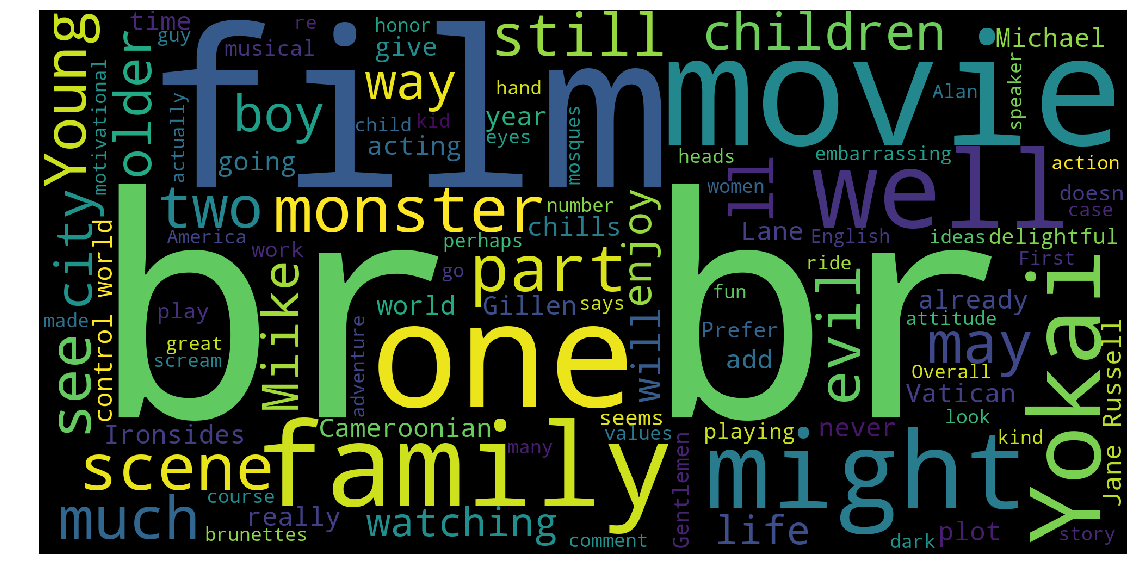

In [84]:
import wordcloud
import matplotlib.pyplot as plt
%matplotlib inline
cloud = np.array(X_train).flatten()
plt.figure(figsize=(20,10))
word_cloud = wordcloud.WordCloud(max_words=100,background_color ="black",
                               width=2000,height=1000,mode="RGB").generate(str(cloud))
plt.axis("off")
plt.imshow(word_cloud)